In [67]:
import requests
import json
import urllib
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import re
import numpy as np
from PIL import Image
import io
import torchvision.transforms as transforms
import torch
import random
import os
import shutil

In [105]:
username = 'dbalani'
password = 'Stuff1234$'
client_id = 'personal-client-92d7485f-5c90-41e5-ba9d-df16d98039b5-6dd0fe80'
client_secret = 'aHZbw59u28o2Mi4PjQKBpc2WKU5yJQF6'

In [106]:
auth_url = 'https://auth.mangadex.org/realms/mangadex/protocol/openid-connect/token'

auth_form_data = {
    'grant_type': 'password',
    'username': username,
    'password': password,
    'client_id': client_id,
    'client_secret': client_secret,
}

auth_headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
}

response = requests.post(auth_url, data=auth_form_data, headers=auth_headers)
print(response.text)

{"access_token":"eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJHSHg0Qmk2THhvdVRGLWZuQmg0WXhMbUtUbGZzT2tmTm9fQ05yT1pMZHNrIn0.eyJleHAiOjE3MDQ4NDI3NzksImlhdCI6MTcwNDg0MTg3OSwianRpIjoiZjM2ODY3YTktN2I4ZS00OTZjLWEzOTUtYzE4NGMyZDFhYmE2IiwiaXNzIjoiaHR0cHM6Ly9hdXRoLm1hbmdhZGV4Lm9yZy9yZWFsbXMvbWFuZ2FkZXgiLCJhdWQiOiJhY2NvdW50Iiwic3ViIjoiOTJkNzQ4NWYtNWM5MC00MWU1LWJhOWQtZGYxNmQ5ODAzOWI1IiwidHlwIjoiQmVhcmVyIiwiYXpwIjoicGVyc29uYWwtY2xpZW50LTkyZDc0ODVmLTVjOTAtNDFlNS1iYTlkLWRmMTZkOTgwMzliNS02ZGQwZmU4MCIsInNlc3Npb25fc3RhdGUiOiJhZjllNTkwZi0zOTIyLTQxYjEtYWUzMS0xMjFjOGQxODczOGYiLCJhY3IiOiIxIiwicmVzb3VyY2VfYWNjZXNzIjp7ImFjY291bnQiOnsicm9sZXMiOlsibWFuYWdlLWFjY291bnQiLCJtYW5hZ2UtYWNjb3VudC1saW5rcyIsInZpZXctcHJvZmlsZSJdfX0sInNjb3BlIjoiZ3JvdXBzIGVtYWlsIHByb2ZpbGUiLCJzaWQiOiJhZjllNTkwZi0zOTIyLTQxYjEtYWUzMS0xMjFjOGQxODczOGYiLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwicm9sZXMiOlsiUk9MRV9VU0VSIiwib2ZmbGluZV9hY2Nlc3MiLCJ1bWFfYXV0aG9yaXphdGlvbiIsImRlZmF1bHQtcm9sZXMtbWFuZ2FkZXgiXSwiZ3JvdXBzIjpbIkdST1VQX1VTRVIiXSwicHJlZmVycmV

In [90]:
response_data = response.json()
access_token = response_data.get('access_token')
refresh_token = response_data.get('refresh_token')
headers = {'Authorization' : 'Bearer ' + access_token}

In [91]:
base_url = 'https://api.mangadex.org'

def get_pics_urls(chapter_id):
    pics_url = base_url + '/at-home/server/' + chapter_id
    pics_response = requests.get(pics_url, headers=headers)
    pics_response_json = pics_response.json()
    chapter_data = pics_response_json['chapter']
    return chapter_data
    
chapter_id = 'c09c5e56-e912-494d-a7ce-dfbc6d58030d'
chapter_data = get_pics_urls(chapter_id)
chapter_data

{'hash': '58229947153b26942f249025da5d0645',
 'data': ['c1-8610c4be9170032ede1df32221b551c582316334d10bd09c7985f362004a0356.png',
  'c2-f0582c87a6f5c930ec7d1a6fc7b709e03b6c1f29c221ce2ac92a78ed6db8ac9a.png',
  'c3-2593667e39f0ba299080dabc06a0bf1eba2f4b9c89b38cfbf7e03f2f0127b176.png',
  'c4-6dc5e9d0f234725703e387ecac1167ca51e7f6f89a86e912781d899396b8763b.png',
  'c5-ce4e2796d1a8fbfd94bfc7f7eda3a10ee6de38d2936bd17c4e1a0c5b24d663ca.png',
  'c6-0c0bc60228ac41f6f9b0930d68ed5e7ff06ad12def9065d18e16b586e91ce16e.png',
  'c7-2cfb71cb1f955cb0fd431d79ba779fe245a50e6d5f39e27df8ae837bf45ffce0.png',
  'c8-00bd5594ab637ad6a49aa9d77e5dd2fb487cee99315545339b49e01821e635ce.png',
  'c9-8954974e6574c04e5abd951a6ce8b8eea0eb06c451929646290c0f0da82e2c96.png',
  'c10-483417554002d24dcb94a60096cf757bfc376e7bc7762146de5eb1561d1dfc09.png',
  'c11-0b47fe67402a6be45c546807fd6e5a7d318a4c8b927be239f96394097f81f80c.png',
  'c12-c621ac7c31870917008c725a094e194feeb5ad6e2bef7f4f027f8a4488c7a8b2.png',
  'c13-f45e177e035e2

In [51]:
chapter_hash = chapter_data['hash']
chapter_pic = chapter_data['dataSaver'][0]

In [35]:
def byte_data_to_image(byte_data):
    byte_stream = io.BytesIO(byte_data)
    image = Image.open(byte_stream)
    return image

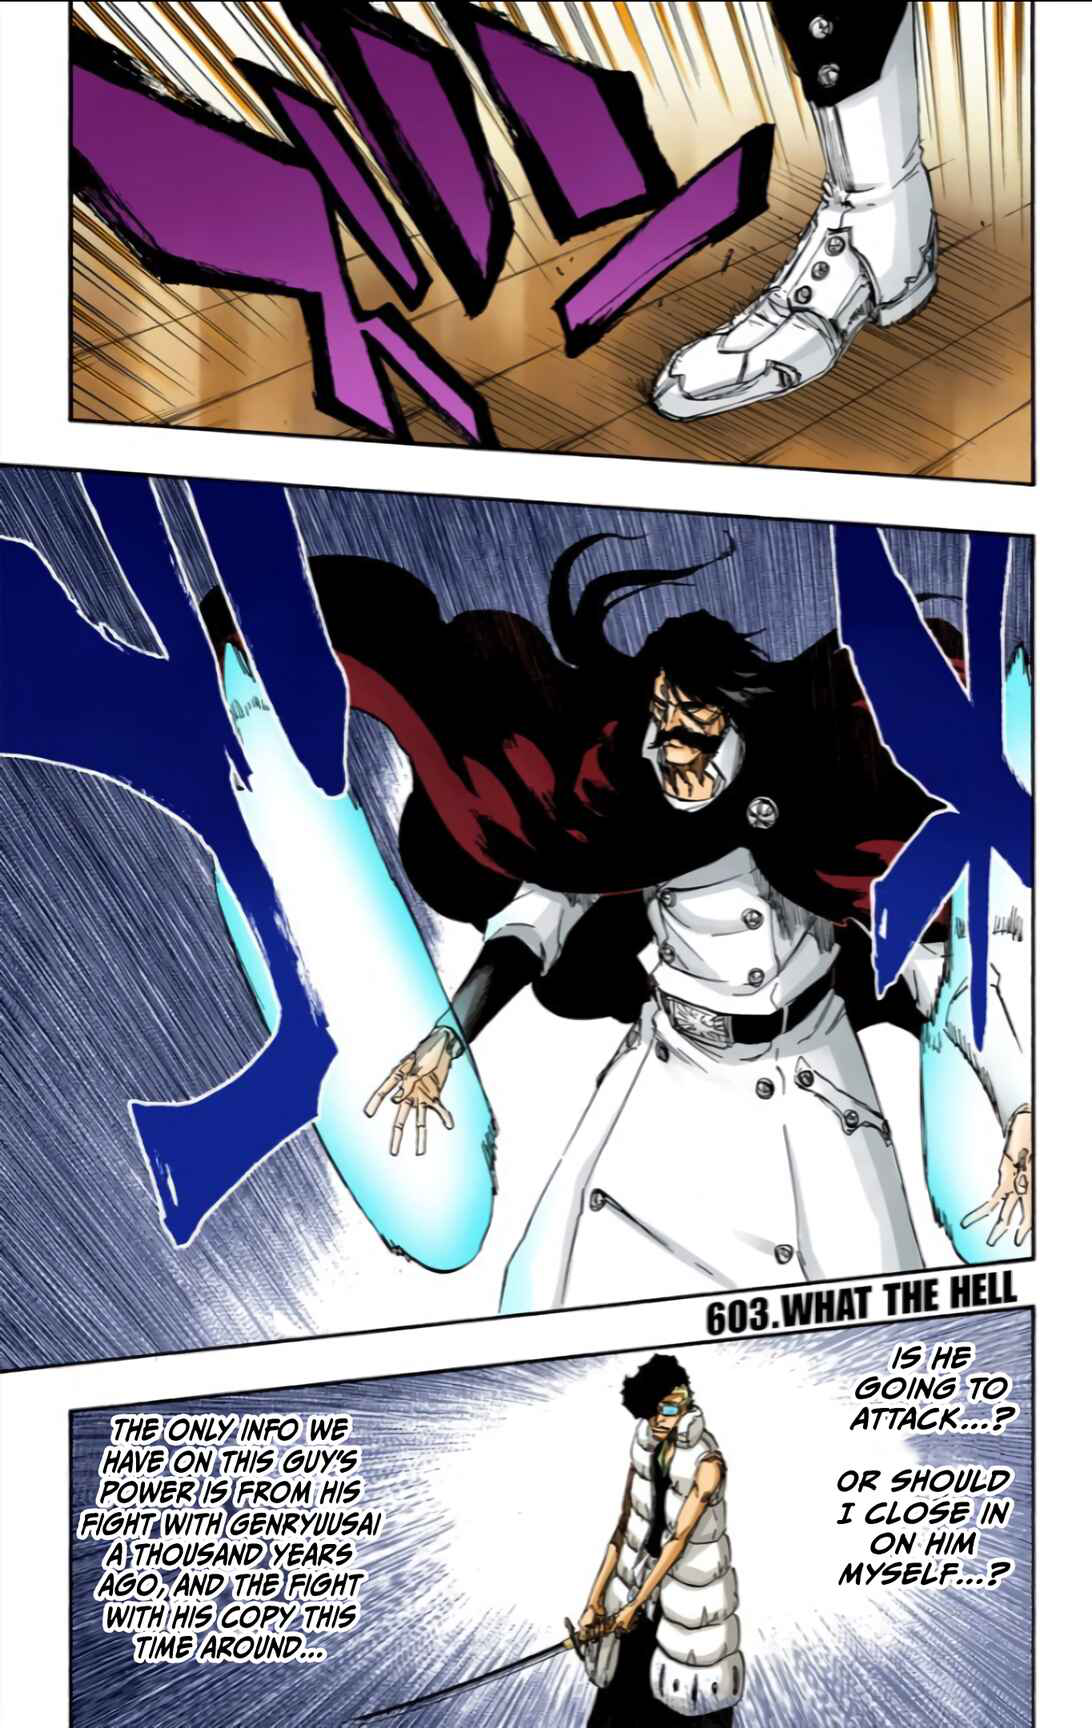

In [36]:
def get_pic(chapter_hash, chapter_pic):
    pic_url = 'https://uploads.mangadex.org/data-saver/' + chapter_hash + '/' + chapter_pic
    pic_response = requests.get(pic_url, headers=headers)
    byte_data = pic_response.content
    img = byte_data_to_image(byte_data)
    return img

img = get_pic(chapter_hash, chapter_pic)
img

In [47]:
def search(title):
    search_response = requests.get(base_url + "/manga", params={"title": title, "limit": 100}, headers=headers)
    search_response_json = search_response.json()
    return search_response_json
    
colored_title = "Digital Colored Comics"
search_response_json = search(colored_title)
search_response_json

{'result': 'ok',
 'response': 'collection',
 'data': [{'id': '733fc3ac-deca-444e-bb79-14186e00ccf1',
   'type': 'manga',
   'attributes': {'title': {'en': 'Shadows House - Digital Colored Comics'},
    'altTitles': [{'es': 'Casa de Sombras'},
     {'en': 'Shadows House (Official Colored)'},
     {'ja-ro': 'Shadōhausu'},
     {'id': 'Keluarga Shadow'},
     {'ru': 'Дом теней'},
     {'ru': 'Мрачный дом'},
     {'ja': 'シャドーハウス'},
     {'zh': '影宅'},
     {'pt-br': 'Casa das Sombras'},
     {'ja': 'シャドーハウス カラー版'},
     {'id': 'Rumah Shadow'}],
    'description': {'en': "Faceless shadow nobles living in a vast mansion, attended by living dolls who spend much of their time cleaning up the soot endlessly emitted by their mysterious masters.  \r\n  \r\nFollow the story of Emilyko, a young and cheerful living doll, as she learns her duties serving as the attendant for Kate Shadow-sama. What dangers and dark secrets will she and Kate encounter, as they become more deeply involved in the inner wo

In [15]:
def clean_title(title):
    lower_title = title.lower()
    suffixes = [" - Digital Colored Comics", " (Official Colored)"]

    for suff in suffixes:
        suffix = suff.lower()
        if lower_title.endswith(suffix):
            return lower_title[: -len(suffix)].strip()

In [80]:
def clean_filename(input_string):
    invalid_chars_regex = re.compile(r'[\\/:*?"<>|]')
    cleaned_string = re.sub(invalid_chars_regex, '', input_string)
    return cleaned_string

In [18]:
search_response_data = search_response_json['data']
titles = {}

for e in search_response_data: 
    cleaned_title = clean_filename(clean_title(e['attributes']['title']['en']))
    titles[cleaned_title] = [e['id']]

In [32]:
for title in titles.keys():
    search_title_response_json = search(title)
    
    first_id = search_title_response_json['data'][0]['id']
    if first_id != titles[title][0] or len(search_title_response_json['data']) == 1:
        monochrome_id = first_id
    else:
        monochrome_id = search_title_response_json['data'][1]['id']
        
    titles[title] += [monochrome_id]

In [50]:
titles['bleach']

['a460ab18-22c1-47eb-a08a-9ee85fe37ec8',
 '239d6260-d71f-43b0-afff-074e3619e3de']

In [36]:
for t in list(titles.keys())[:]:
    if titles[t][0] == titles[t][1]:
        del titles[t]

In [14]:
len(titles)

80

In [85]:
with open('titles.txt', 'w') as f:
    json.dump(titles, f)

In [7]:
with open('titles.txt', 'r') as f:
    json_content = f.read()
    titles = json.loads(json_content)

In [66]:
def image_to_tensor(img):
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    tensor = transform(img)
    return tensor

manga_tensor = image_to_tensor(img)

In [67]:
manga_tensor.shape

torch.Size([3, 1728, 1092])

In [43]:
def tensor_to_image(tensor):
    to_pil = transforms.ToPILImage()
    pil_image = to_pil(tensor)
    return pil_image

In [44]:
def compress_image(img):
    new_width = int(img.width / 2)
    new_height = int(img.height / 2)
    resized_img = img.resize((new_width, new_height), Image.ANTIALIAS)
    return resized_img

In [112]:
def get_chapters(manga_id):
    chapter_ids = {}
    
    offset = 0
    total = None
    while not total or offset < total:
        chapters_url = base_url + '/manga/' + manga_id + '/feed'
        chapters_response = requests.get(chapters_url, headers=headers, params={"limit": 500, "offset": offset})
        if chapters_response.status_code != 200:
            print(total, offset)
            print(chapters_url, title, chapters_response.text)
        chapters_response_json = chapters_response.json()
        
        for chapter in chapters_response_json['data']:
            if chapter['attributes']['translatedLanguage'] == 'en':
                chapter_ids[ chapter['attributes']['chapter'] ] = chapter['id']
        
        total = chapters_response_json['total']
        offset += 500
    
    return chapter_ids

color_chapter_ids = get_chapters(titles['bleach'][0])
bw_chapter_ids = get_chapters(titles['bleach'][1])

In [113]:
all_color_chapter_ids = {}
all_bw_chapter_ids = {}
for title in titles.keys():
    color_chapter_ids = get_chapters(titles[title][0])
    bw_chapter_ids = get_chapters(titles[title][1])
    
    all_color_chapter_ids[title] = color_chapter_ids
    all_bw_chapter_ids[title] = bw_chapter_ids

4975 4500
https://api.mangadex.org/manga/239d6260-d71f-43b0-afff-074e3619e3de/feed bleach <!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>MangaDex</title>
  <link rel="icon" href="/favicon.svg">
  <style>
    * {
      box-sizing: border-box;
    }

    a {
      color: #ff6740;
      font-weight: bold;
      text-decoration: none;
    }

    html {
      background-color: #242424;
      color: #fff;
      font-family: Poppins, sans-serif;
      height: 100%;
      margin: auto;
      max-height: 1000px;
      max-width: 600px;
      padding: 0;
    }

    body {
      display: flex;
      flex-direction: column;
      gap: 2rem;
      height: 100%;
      justify-content: start;
      margin: 0;
      padding: 0.5rem;
      place-items: center;
    }

    .header {
      display: flex;
      flex-direction: row;
      gap: 1rem;
    }

    #logo {
      height: 4rem;
    }

    #wordmark {


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
with open('all_color_chapter_ids.txt', 'w') as f:
    json.dump(all_color_chapter_ids, f)

with open('all_bw_chapter_ids.txt', 'w') as f:
    json.dump(all_bw_chapter_ids, f)

In [27]:
common_chapters = list(set(color_chapter_ids.keys()).intersection(set(bw_chapter_ids.keys())))

for chapter in common_chapters:

    bw_chapter_id = bw_chapter_ids[chapter]
    color_chapter_id = color_chapter_ids[chapter]

    bw_chapter_data = get_pics_urls(bw_chapter_id)
    bw_chapter_hash = bw_chapter_data['hash']
    bw_chapter_urls = bw_chapter_data['dataSaver']

    color_chapter_data = get_pics_urls(color_chapter_id)
    color_chapter_hash = color_chapter_data['hash']
    color_chapter_urls = color_chapter_data['dataSaver']

    bw_pic = get_pic(bw_chapter_hash, bw_chapter_urls[0])
    color_pic = get_pic(color_chapter_hash, color_chapter_urls[0])
    
bw_pic, color_pic

(<PIL.JpegImagePlugin.JpegImageFile image mode=L size=904x1300 at 0x2477CA81E50>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=760x1200 at 0x2477CA81E20>)

In [61]:
bw_pic = get_pic(bw_chapter_hash, bw_chapter_urls[0])
color_pic = get_pic(color_chapter_hash, color_chapter_urls[0])

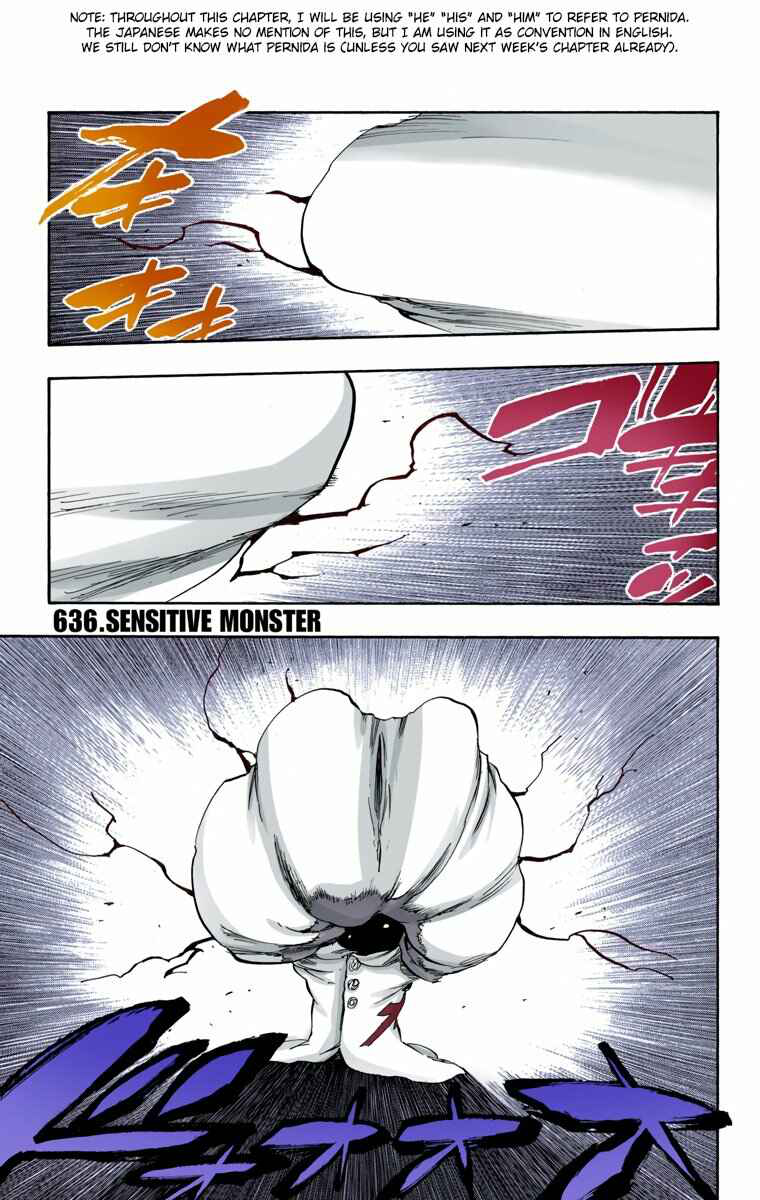

In [62]:
color_pic

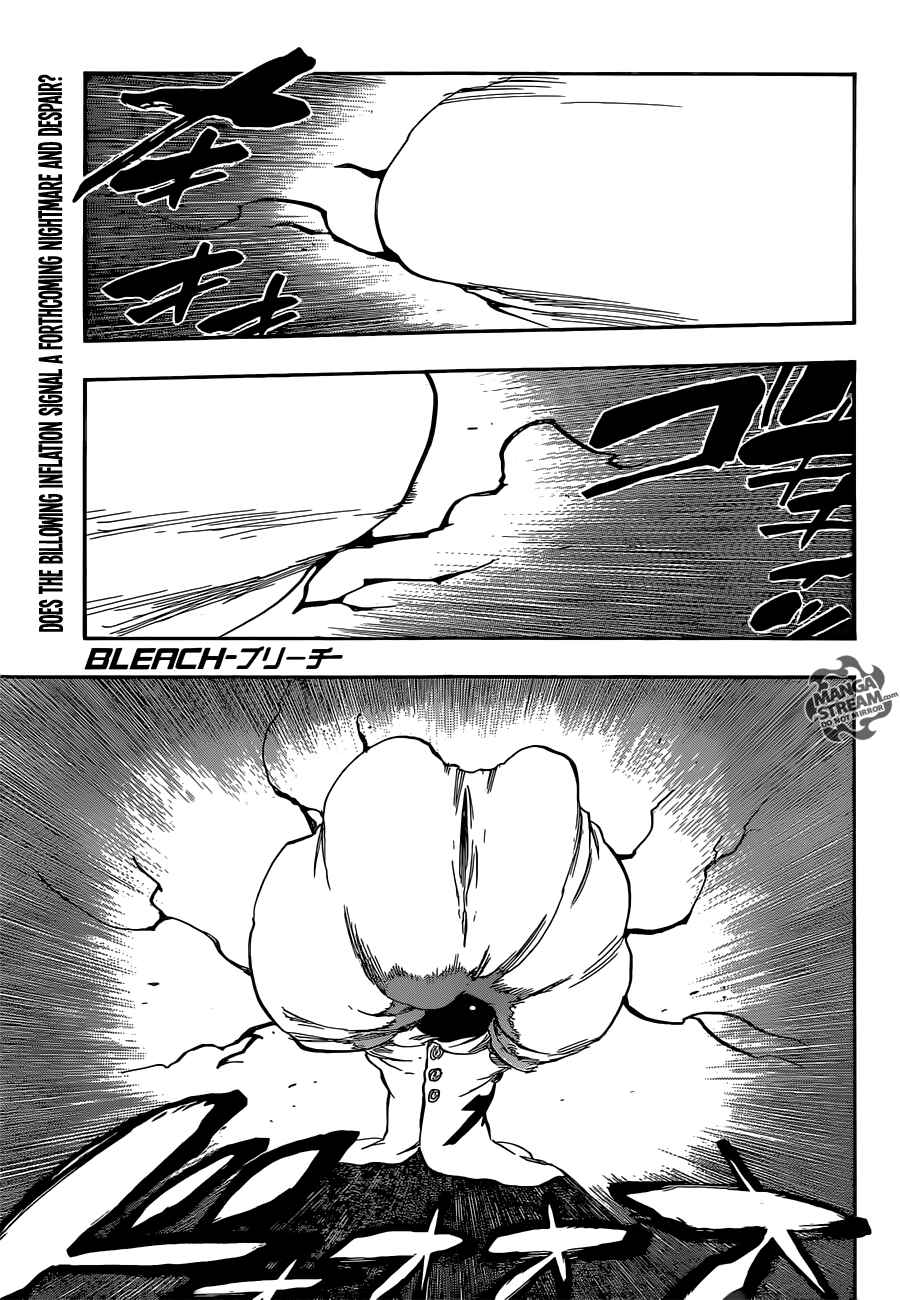

In [63]:
bw_pic

In [92]:
for title in titles.keys(): #figure out refresh
    color_chapter_ids = get_chapters(titles[title][0])
    bw_chapter_ids = get_chapters(titles[title][1])
            
    common_chapters = set(color_chapter_ids.keys()).intersection(set(bw_chapter_ids.keys()))
    common_chapters.discard(None)

    for chapter in common_chapters:
        
        bw_chapter_path = 'bw/' + title + '/' + chapter
        if not os.path.exists(bw_chapter_path):
            bw_chapter_id = bw_chapter_ids[chapter]
            bw_chapter_data = get_pics_urls(bw_chapter_id)
            bw_chapter_hash = bw_chapter_data['hash']

            if bw_chapter_data['dataSaver'] or bw_chapter_data['data']:
                bw_chapter_urls = bw_chapter_data['dataSaver']

                if not bw_chapter_urls:
                    bw_chapter_urls = bw_chapter_data['data']

                for i in range(len(bw_chapter_urls)):
                    bw_chapter_url = bw_chapter_urls[i]
                    bw_pic = get_pic(bw_chapter_hash, bw_chapter_url)

                    if bw_pic.mode != 'L':
                        bw_pic = bw_pic.convert('L')

                    bw_pic_path = 'bw/' + title + '/' + chapter + '/' + str(i) + '.jpg'
                    os.makedirs(os.path.dirname(bw_pic_path), exist_ok=True)
                    bw_pic.save(bw_pic_path)
        
        color_chapter_path = 'color/' + title + '/' + chapter
        if not os.path.exists(color_chapter_path):
            color_chapter_id = color_chapter_ids[chapter]
            color_chapter_data = get_pics_urls(color_chapter_id)
            color_chapter_hash = color_chapter_data['hash']

            if color_chapter_data['dataSaver'] or color_chapter_data['data']:
                color_chapter_urls = color_chapter_data['dataSaver']

                if not color_chapter_urls:
                    color_chapter_urls = color_chapter_data['data']

                for i in range(len(color_chapter_urls)):
                    color_chapter_url = color_chapter_urls[i]
                    color_pic = get_pic(color_chapter_hash, color_chapter_url)

                    color_pic_path = 'color/' + title + '/' + chapter + '/' + str(i) + '.jpg'
                    os.makedirs(os.path.dirname(color_pic_path), exist_ok=True)
                    color_pic.save(color_pic_path)
